In [1]:
import yfinance as yf 
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller

In [2]:
end_date = datetime.today().strftime('%Y-%m-%d')
spy = yf.download('SPY', start='1993-01-29', end=end_date)

[*********************100%***********************]  1 of 1 completed


1. **Simple Return**:  
   $R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$

2. **Log Return**:  
   $R_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$

In [4]:
spy = spy.drop(columns=["Open", "High", "Low", "Close", "Volume"])
spy.reset_index(inplace=True)
spy = spy.rename(columns={"Adj Close": "close_price", "Date": "date"})
spy["date"] = pd.to_datetime(spy["date"])
spy['simple_return'] = (spy['close_price'] - spy['close_price'].shift(1)) / spy['close_price'].shift(1)
spy['log_return'] = np.log(spy['close_price'] / spy['close_price'].shift(1))
spy['days_elapsed'] = (spy['date'] - spy['date'].iloc[0]).dt.days
spy['log_return'] = spy['log_return'].fillna(0)
spy['simple_return'] = spy['simple_return'].fillna(0)
spy["close_price"] = spy["close_price"].round(2)

In [5]:
if spy['log_return'].between(-1, 1).all():
    print("All log returns are between -1 and 1.")
else:
    print("Some log returns are outside the range -1 to 1.")

All log returns are between -1 and 1.


In [6]:
# Create DataFrame for monthly only data 

spy.set_index('date', inplace=True)  
spy_month = spy.resample('MS').first().reset_index()  # 'MS' for monthly start
spy_month['log_return'] = np.log(spy_month['close_price'] / spy_month['close_price'].shift(1))
spy_month = spy_month.dropna(subset=['log_return'])
spy_month

,date,close_price,simple_return,log_return,days_elapsed
1,1993-02-01,24.70,0.007112,0.006906,3
2,1993-03-01,24.72,-0.002815,0.000809,31
3,1993-04-01,25.26,-0.003458,0.021609,62
4,1993-05-01,24.85,0.006388,-0.016364,94
5,1993-06-01,25.61,0.009674,0.030125,123
...,...,...,...,...,...
379,2024-08-01,539.53,-0.014161,-0.004291,11507
380,2024-09-01,548.55,-0.020579,0.016580,11540
381,2024-10-01,566.71,-0.008958,0.032569,11568
382,2024-11-01,569.12,0.004221,0.004244,11599


In [7]:
spy.shape

(8038, 4)

In [8]:
spy_week = spy.resample('W').first().reset_index()  # 'W' for weekly start
spy_week['log_return'] = np.log(spy_week['close_price'] / spy_week['close_price'].shift(1))
spy_week = spy_week.dropna(subset=['log_return'])
spy_week

,date,close_price,simple_return,log_return,days_elapsed
1,1993-02-07,24.70,0.007112,0.006906,3
2,1993-02-14,25.10,0.000000,0.016065,10
3,1993-02-21,24.26,-0.025227,-0.034039,18
4,1993-02-28,24.40,0.003587,0.005754,24
5,1993-03-07,24.72,-0.002815,0.013030,31
...,...,...,...,...,...
1662,2024-12-08,601.61,0.001792,0.010158,11630
1663,2024-12-15,602.65,-0.005150,0.001727,11637
1664,2024-12-22,604.75,0.004270,0.003479,11644
1665,2024-12-29,594.69,0.005988,-0.016775,11651


In [9]:
spy.reset_index(inplace=True)

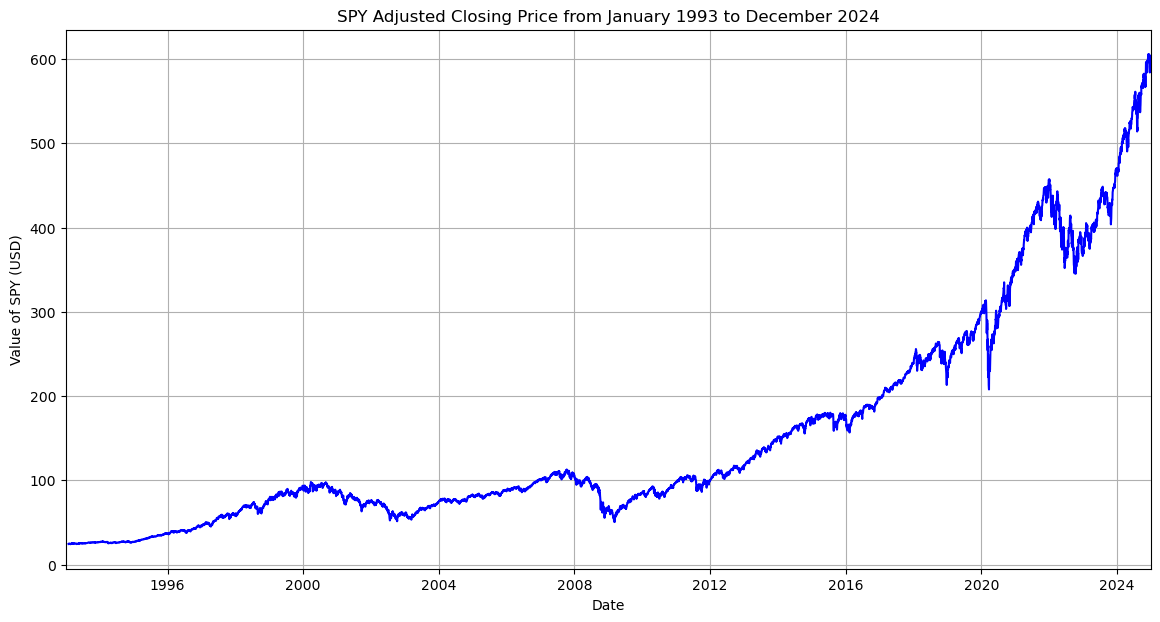

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(spy["date"], spy["close_price"], color="blue", label="No Inflation")
plt.title("SPY Adjusted Closing Price from January 1993 to December 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Value of SPY (USD)")
plt.grid(True)
plt.show()

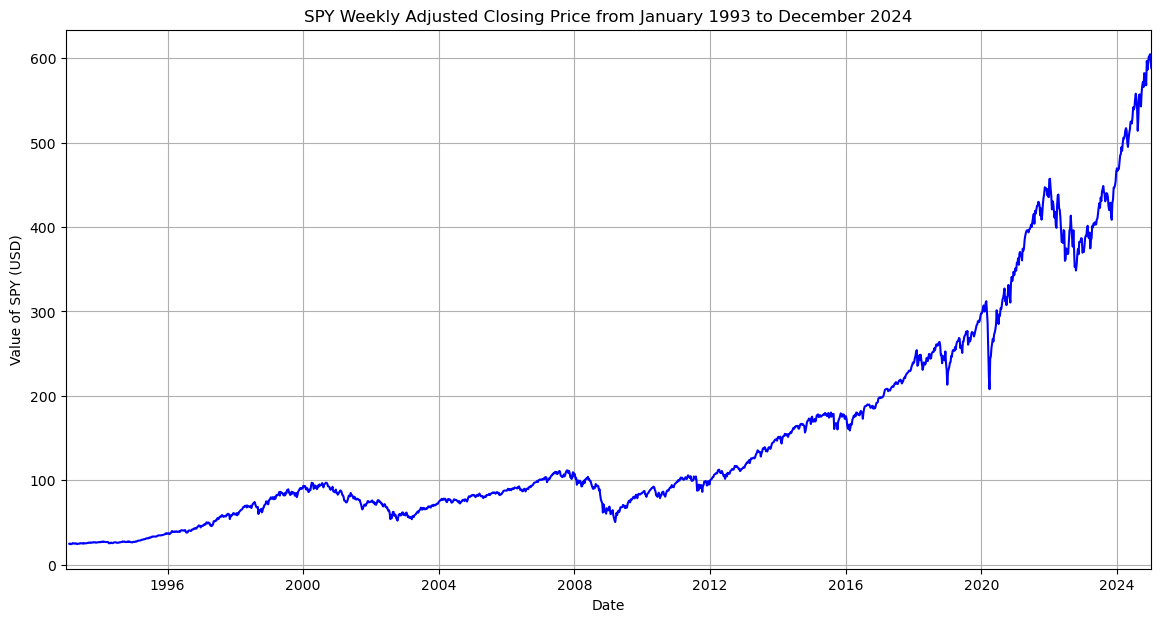

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(spy_week["date"], spy_week["close_price"], color="blue", label="No Inflation")
plt.title("SPY Weekly Adjusted Closing Price from January 1993 to December 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Value of SPY (USD)")
plt.grid(True)
plt.show()

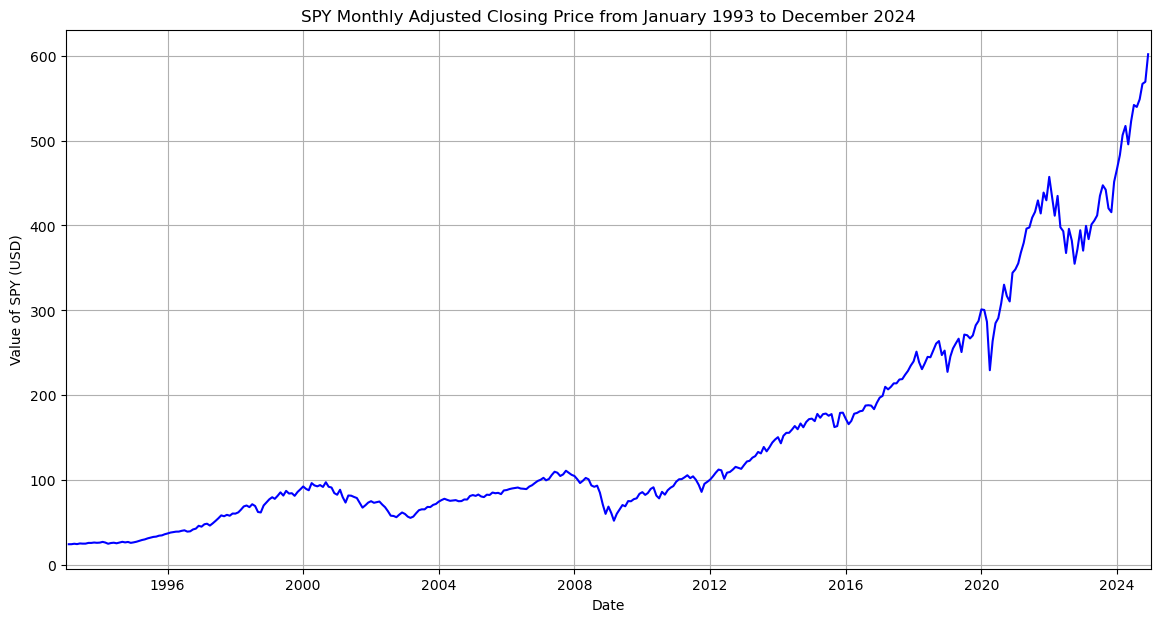

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(spy_month["date"], spy_month["close_price"], color="blue", label="No Inflation")
plt.title("SPY Monthly Adjusted Closing Price from January 1993 to December 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Value of SPY (USD)")
plt.grid(True)
plt.show()

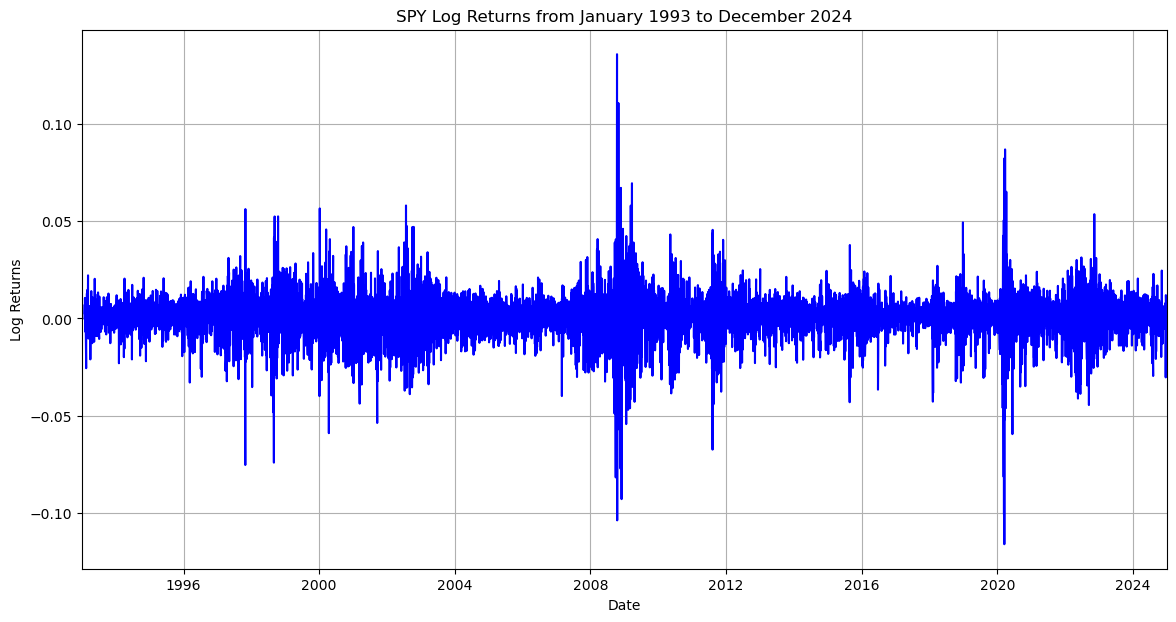

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(spy["date"], spy["log_return"], color="blue", label="No Inflation")
plt.title("SPY Log Returns from January 1993 to December 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.grid(True)
plt.show()

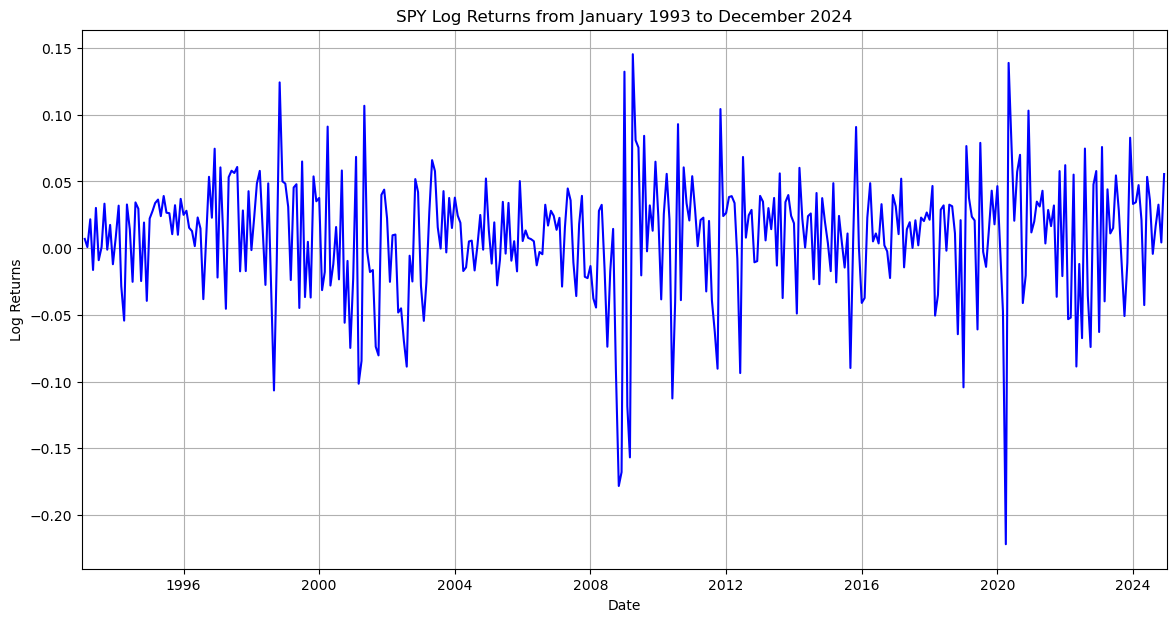

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(spy_month["date"], spy_month["log_return"], color="blue", label="No Inflation")
plt.title("SPY Log Returns from January 1993 to December 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.grid(True)
plt.show()

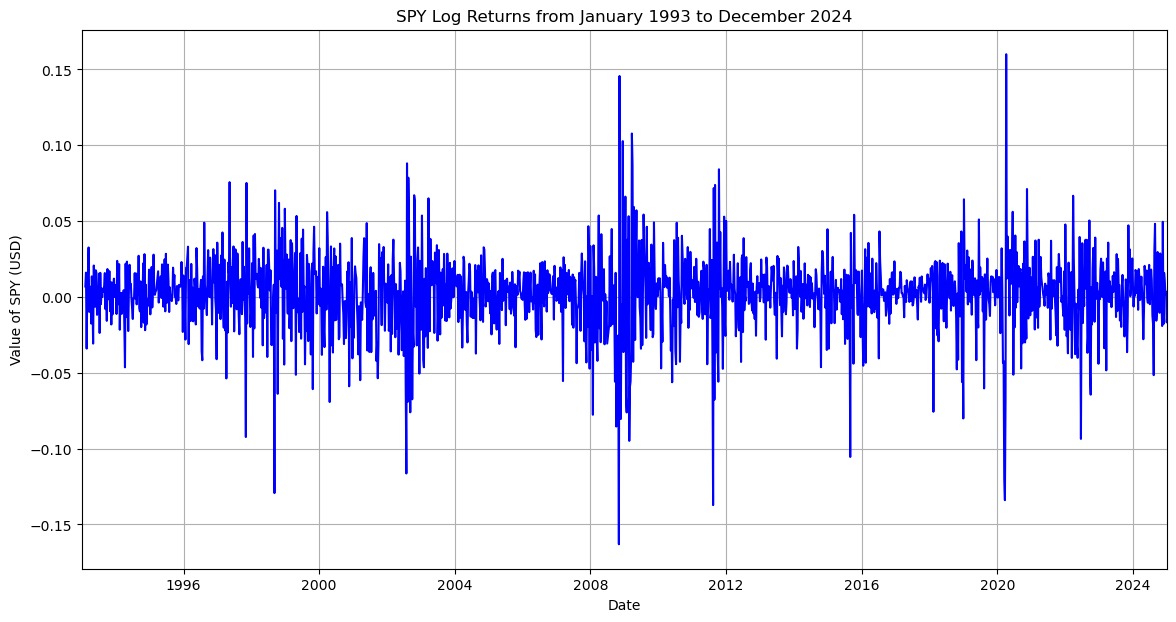

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(spy_week["date"], spy_week["log_return"], color="blue", label="No Inflation")
plt.title("SPY Log Returns from January 1993 to December 2024")
plt.xlim([datetime(1993, 1, 1), datetime(2024, 12, 31)])
plt.xlabel("Date")
plt.ylabel("Value of SPY (USD)")
plt.grid(True)
plt.savefig("spy_1_diff.png")
plt.show()

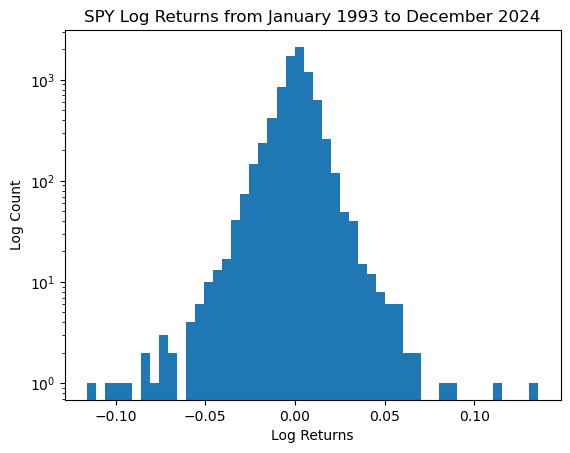

In [16]:
plt.hist(spy['log_return'], bins=50, log=True)  # Use log=True for y-axis
plt.title("SPY Log Returns from January 1993 to December 2024")
plt.xlabel("Log Returns")
plt.ylabel("Log Count")
plt.show()

In [17]:
adf = adfuller(spy['log_return'])
print(f'ADF statistic: {adf[0]:.10f}\n'
      f'p-value: {adf[1]:.10f}\n')

ADF statistic: -16.6074004665
p-value: 0.0000000000



In [18]:
spy['diff_1'] = spy['close_price'].diff().fillna(0)

In [19]:
adf = adfuller(spy['diff_1'])
print(f'ADF statistic: {adf[0]:.10f}\n'
      f'p-value: {adf[1]:.10f}\n')

ADF statistic: -17.8000812800
p-value: 0.0000000000



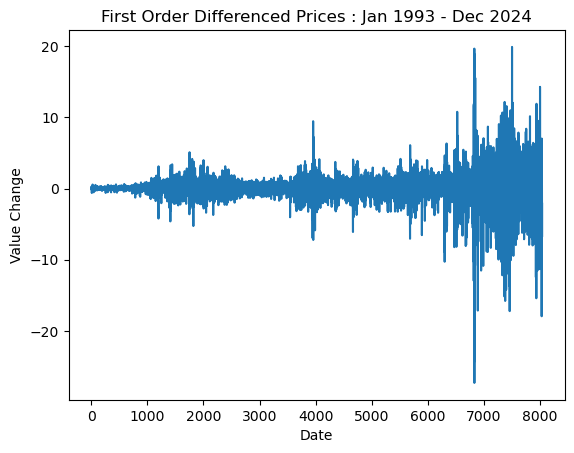

In [20]:
plt.plot(spy['diff_1'])
plt.title("First Order Differenced Prices : Jan 1993 - Dec 2024")
plt.xlabel('Date')
plt.ylabel('Value Change')
plt.show()

In [21]:
spy.to_csv('spy_full.csv', index=False)
spy_week.to_csv('spy_week.csv', index=False)
spy_month.to_csv('spy_month.csv', index=False)